In [33]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPool2D, Flatten, Dense

import pickle
import time


path_to_train_images = './Face_NoFace'
path_to_test_images = "./Face_NoFace_test"

train_datagen = ImageDataGenerator(
    shear_range=0.1, zoom_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator()

x_train = train_datagen.flow_from_directory(
    path_to_train_images, target_size=(64, 64), batch_size=32, class_mode='categorical')
x_test = test_datagen.flow_from_directory(path_to_test_images, 
    target_size=(64, 64), batch_size=32, class_mode='categorical')

Y_train = x_train.class_indices


res_map = {}
for face_val, face_name in zip(Y_train.values(), Y_train.keys()):
    res_map[face_val] = face_name

with open("ResultsMap.pkl", 'wb') as file:
    pickle.dump(res_map, file)

output_neurons = len(res_map)

cnn_model = Sequential([
    Convolution2D(32, kernel_size=(5, 5), strides=(1, 1),
                  input_shape=(64, 64, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(output_neurons, activation='softmax')
])

cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam', metrics=["accuracy"])


start_train_time = time.time()

# cnn_model.fit(x_train, epochs=20)
cnn_model.fit(x_train)

totaltime = time.time() - start_train_time
print('Time taken:', round(totaltime/60), 'minute(s)', round(totaltime%60), 'second(s)')

cnn_model.save("face_detect.keras")

Found 2947 images belonging to 2 classes.
Found 1507 images belonging to 2 classes.
Epoch 1/20
93/93 [==============================] - 57s 596ms/step - loss: 12.4085 - accuracy: 0.6909 - val_loss: 0.8634 - val_accuracy: 0.5050
Epoch 2/20
93/93 [==============================] - 55s 591ms/step - loss: 0.5104 - accuracy: 0.7838 - val_loss: 0.7491 - val_accuracy: 0.5408
Epoch 3/20
93/93 [==============================] - 58s 625ms/step - loss: 0.4052 - accuracy: 0.8266 - val_loss: 0.7169 - val_accuracy: 0.6350
Epoch 4/20
93/93 [==============================] - 57s 606ms/step - loss: 0.3684 - accuracy: 0.8554 - val_loss: 0.8124 - val_accuracy: 0.6370
Epoch 5/20
93/93 [==============================] - 61s 656ms/step - loss: 0.3257 - accuracy: 0.8646 - val_loss: 0.7602 - val_accuracy: 0.6583
Epoch 6/20
93/93 [==============================] - 59s 625ms/step - loss: 0.2794 - accuracy: 0.8965 - val_loss: 0.5236 - val_accuracy: 0.7810
Epoch 7/20
93/93 [==============================] - 60s 6

In [64]:
from keras.preprocessing import image
import keras
import numpy as np
import pickle
import os


cnn_model = keras.models.load_model("face_detect.keras")
res_map_file = "ResultsMap.pkl"
res_map = {}
with open(res_map_file, 'rb') as file:
    unpickler = pickle.Unpickler(file)
    res_map = unpickler.load()
    
# imgfile = "/home/phucle03/Phuc/Projects/DoAn/Smart-Store/Backend/temp/imgs/0788b05d-2e5d-49b1-afb5-f877eab6d953.jpg"
imgdir = "./Face Images/TestUnknown/"

for img in ["phuc.jpg", "phuong.jpg", "obama.jpg", "biden.jpg", "qhuy.jpg", "trump.jpg", "putin.jpeg", "cat.png", "dog.png", "horse.jpg","flower.png"]:
    imgfile = os.path.join(imgdir, img)

    test_image = image.load_img(imgfile, target_size=(64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    result = cnn_model.predict(test_image, verbose=0)

    print('Prediction:', img, '->', res_map[np.argmax(result)], result)

Prediction: phuc.jpg -> 1 [[0.03118205 0.96881795]]
Prediction: phuong.jpg -> 1 [[0.00103931 0.99896073]]
Prediction: obama.jpg -> 1 [[0.08905838 0.9109416 ]]
Prediction: biden.jpg -> 1 [[2.1792408e-11 1.0000000e+00]]
Prediction: qhuy.jpg -> 1 [[0.0797618 0.9202382]]
Prediction: trump.jpg -> 1 [[0.09411711 0.9058829 ]]
Prediction: putin.jpeg -> 1 [[1.5197997e-16 1.0000000e+00]]
Prediction: cat.png -> 0 [[9.9999571e-01 4.3365185e-06]]
Prediction: dog.png -> 0 [[0.9759664  0.02403362]]
Prediction: horse.jpg -> 0 [[0.99129957 0.00870046]]
Prediction: flower.png -> 0 [[9.999993e-01 6.907733e-07]]


In [58]:
from keras.preprocessing.image import ImageDataGenerator
import pickle
import keras
import os

import numpy as np


path_to_test_images = "./Face_NoFace_test"

cnn_model = keras.models.load_model("face_detect.keras")
res_map_file = "ResultsMap.pkl"
res_map = {}
with open(res_map_file, 'rb') as file:
    unpickler = pickle.Unpickler(file)
    res_map = unpickler.load()

# predictions = cnn_model.predict(x_test)
# mapped_predictions = [[np.argmax(x)] for x in predictions]
# # predicted_labels = np.argmax(predictions, axis=1)
# predicted_labels = mapped_predictions
# # print(predicted_labels)
test_labels = []
predicted_labels = []

for test_class in os.listdir(path_to_test_images):
    tc = str(test_class)
    # print(tc)
    for file in os.listdir(os.path.join(path_to_test_images, test_class)):
        imgfile = os.path.join(path_to_test_images, test_class, file)
        test_image = image.load_img(imgfile, target_size=(64, 64))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis=0)
        result = cnn_model.predict(test_image, verbose=0)
        test_labels.append(tc)
        predicted = res_map[np.argmax(result)]
        predicted_labels.append(predicted)
    

Accuracy: 0.8806
[[457  64]
 [116 870]]


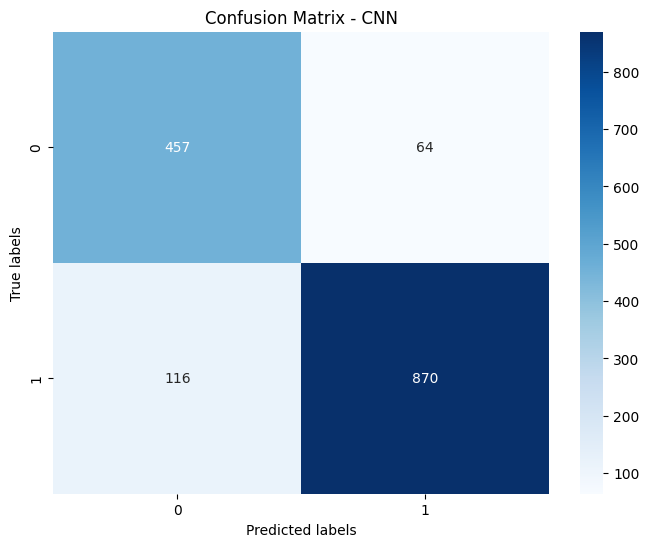

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# evaluate the model on the test data set
test_acc = accuracy_score(test_labels, predicted_labels)
print('Accuracy:', round(test_acc,4))

conf_matrix = confusion_matrix(test_labels, predicted_labels)
print(conf_matrix)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = [0, 1])
# disp.plot()
# plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - CNN')
plt.show()
